# Variable Importance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, make_scorer

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.inspection import permutation_importance

In [2]:
# import data
data = pd.read_csv('prefire_knp_blr_grouped_finaldata.csv')

#drop Land Cover and dnbr6 because they are categorical variables
data = data.drop(['LC'], axis = 1)
data = data.drop(['dnbr6'], axis = 1)

#drop latitude and longitude because it is not important for prediction
data = data.drop(['Lat'], axis = 1)
data = data.drop(['Lon'], axis = 1)

#save the dnbr (to add it back after standardization)
dnbr = data['dnbr']

data.head()

,dnbr,aspect,slope,elev,LST_int,LST_slope,ET_int,ET_slope,ESI_int,ESI_slope,...,PM_sm_int,PM_sm_slope,tdmean_int,tdmean_slope,tmean_int,tmean_slope,vpdmax_int,vpdmax_slope,vpdmin_int,vpdmin_slope
0,76,5.460900,0.291767,2194,287.050076,-0.370344,237.254236,6.423927,0.757595,0.025706,...,0.157490,0.001382,2.746614,0.546695,20.815225,0.012717,29.686592,-0.357288,7.580628,-0.324832
1,136,5.460900,0.291767,2184,286.912748,-0.422366,246.656719,5.893267,0.773286,0.024426,...,0.157397,0.001391,2.769429,0.546505,20.852224,0.012598,29.726778,-0.358042,7.632476,-0.325476
2,186,5.460900,0.291767,2210,286.949466,-0.382595,247.353218,8.573589,0.774654,0.030621,...,0.157567,0.001398,2.755586,0.546697,20.828943,0.012751,29.714425,-0.357853,7.591093,-0.324775
3,112,5.131421,0.284007,2226,286.772392,-0.462430,242.966737,6.884124,0.769155,0.027001,...,0.157738,0.001404,2.741742,0.546890,20.805661,0.012903,29.702070,-0.357665,7.549710,-0.324074
4,122,4.706265,0.283730,2235,286.573791,-0.530394,238.038991,5.098363,0.751983,0.021865,...,0.157909,0.001411,2.727899,0.547082,20.782380,0.013056,29.689716,-0.357477,7.508327,-0.323372


In [3]:
#Make the features be everything but dnbr
data = data.drop(['dnbr'], axis = 1)
features = data  # Features

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Put standardized features into a new DataFrame
df = pd.DataFrame(scaled_features, columns=features.columns)

# Create a new DataFrame with dnbr added back
df = pd.concat([dnbr, df], axis=1)

# Split the DataFrame into training and testing datasets
data, test_df = train_test_split(df, test_size=0.4, random_state=42)

#Check to see if it is standardized
data.head() 

,dnbr,aspect,slope,elev,LST_int,LST_slope,ET_int,ET_slope,ESI_int,ESI_slope,...,PM_sm_int,PM_sm_slope,tdmean_int,tdmean_slope,tmean_int,tmean_slope,vpdmax_int,vpdmax_slope,vpdmin_int,vpdmin_slope
83977,312,0.048618,0.430133,0.884767,-0.326874,0.30575,-0.190251,-0.716343,-0.944126,-1.076024,...,-0.393733,-1.273653,-0.180067,-0.265964,0.086853,0.226975,0.097999,0.286105,0.224457,-0.863294
56917,207,0.074888,-0.015554,-0.661874,-0.326874,0.30575,1.038442,0.419363,0.834707,0.072303,...,-0.228841,-0.477134,0.895344,-0.215729,0.901698,-1.018723,0.776085,-0.961139,1.027555,-1.453528
56181,23,-1.889566,-1.757768,-1.673715,-0.326874,0.30575,0.032912,0.925466,0.802445,1.299254,...,-1.646300,-0.608038,1.967978,-0.120273,1.718935,1.669188,1.683760,-0.884030,1.777763,-0.463458
29351,244,-0.769398,-0.140552,1.319024,-0.326874,0.30575,1.212496,1.757447,0.643239,1.606441,...,2.304954,0.584994,-2.047770,-2.446993,-2.103209,0.308231,-1.957133,2.011037,-1.826987,3.392895
37192,121,-0.802506,0.043363,0.046201,-0.326874,0.30575,0.891840,0.658422,0.798781,0.176033,...,0.560909,0.493630,-0.260248,-0.693428,-0.323945,-1.443554,-0.561267,0.296228,-0.200592,-0.267101


In [4]:
def prep_data(data):
    X = data.drop(['dnbr'], axis = 1)
    y = data['dnbr']
    return(X,y)

X_train, y_train = prep_data(data)
X_test, y_test = prep_data(test_df)

In [5]:
%%time

#Fit model
ET = ExtraTreesRegressor(n_estimators=100, random_state=42)
ET.fit(X_train, y_train)

r2_train = r2_score(y_train, ET.predict(X_train))
r2_test = r2_score(y_test, ET.predict(X_test))

r2_train, r2_test

CPU times: user 41.4 s, sys: 575 ms, total: 42 s
Wall time: 42.3 s


(0.9999999999997455, 0.738228379719438)

Return the feature importances.

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

Warning: impurity-based feature importances can be misleading for high cardinality features (many unique values). See sklearn.inspection.permutation_importance as an alternative.

In [6]:
importances = ET.feature_importances_

#grab all column names
feature_names = []
for col in features.columns:
    feature_names.append(col)


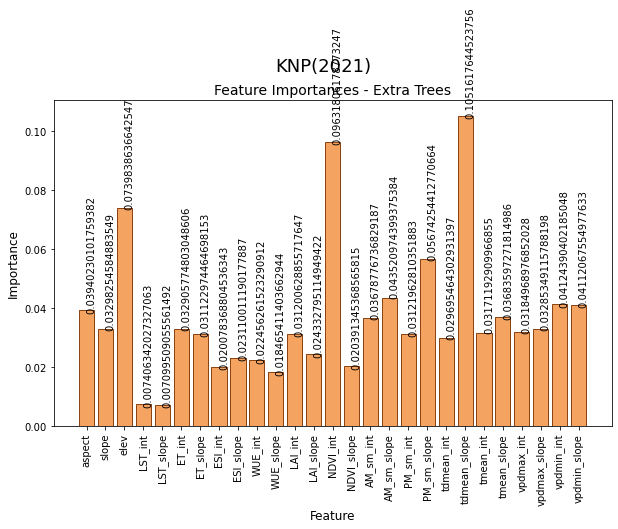

In [7]:
plt.figure(figsize=(10, 6))
plt.suptitle("KNP(2021)", fontsize = 18)
plt.title("Feature Importances - Extra Trees", fontsize = 14)
plt.bar(range(X_train.shape[1]), importances, align="center", facecolor = "sandybrown", edgecolor = "saddlebrown")
plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
plt.xlabel("Feature", fontsize = 12)
plt.ylabel("Importance", fontsize = 12)

for i, v in enumerate(importances):
    plt.text(round(i,3), round(v,3), str(v), rotation = 90)
             
plt.show()

In [8]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

#grab all column names
feature_names = []
for col in features.columns:
    feature_names.append(col)
    
result = permutation_importance(
    ET, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

feature_importances = pd.Series(result.importances_mean, index=feature_names)

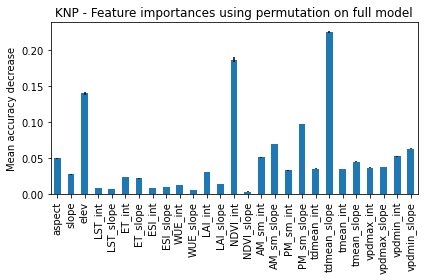

In [9]:
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("KNP - Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [10]:
feature_importances

aspect          0.049856
slope           0.027466
elev            0.139998
LST_int         0.008590
LST_slope       0.006876
ET_int          0.023936
ET_slope        0.021953
ESI_int         0.009007
ESI_slope       0.010221
WUE_int         0.012356
WUE_slope       0.006179
LAI_int         0.030849
LAI_slope       0.014454
NDVI_int        0.187109
NDVI_slope      0.003401
AM_sm_int       0.050991
AM_sm_slope     0.069886
PM_sm_int       0.033183
PM_sm_slope     0.097609
tdmean_int      0.035319
tdmean_slope    0.225861
tmean_int       0.035282
tmean_slope     0.044996
vpdmax_int      0.036937
vpdmax_slope    0.037945
vpdmin_int      0.052564
vpdmin_slope    0.063434
dtype: float64